# Analysis of case studies and results

In [1]:
import pandas as pd
import os

In [2]:
# use R to create the plot using ggplot2
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # put here your own R directory

In [3]:
%load_ext rpy2.ipython

In [4]:
Parkinsons_AE    = [1, 1.0, 1, 1, 1, 1, 0.5, None, None, None, 1, 1, None]
NBIA_GEO         = [1, 1.0, 1, 0.6, 1, 1, 0.5, 0.3, None, 0.5, 1, 1, None]
TiO2_eNM         = [1, 0.2, 1, 0.6, 0.7, 1, 0.5, 0.3, None, 0.5, 1, 1, 0.5]
calcitriol_ChEBI = [1, 1.0, 0.1, 0.6, 1, 0.8, 0.5, 0.3, 0.1, 0.5, 1, 1, None]
data = {
        "Parkinsons_AE"    : Parkinsons_AE,
        "NBIA_GEO"         : NBIA_GEO,
        "TiO2_ENM"         : TiO2_eNM,
        "Caffeine_ChEBI" : calcitriol_ChEBI,
       }
df = pd.DataFrame (data)

# display
pd.set_option("display.max_rows",df.shape[0])
df

,Parkinsons_AE,NBIA_GEO,TiO2_ENM,Caffeine_ChEBI
0,1.0,1.0,1.0,1.0
1,1.0,1.0,0.2,1.0
2,1.0,1.0,1.0,0.1
3,1.0,0.6,0.6,0.6
4,1.0,1.0,0.7,1.0
5,1.0,1.0,1.0,0.8
6,0.5,0.5,0.5,0.5
7,NaN,0.3,0.3,0.3
8,NaN,NaN,NaN,0.1
9,NaN,0.5,0.5,0.5


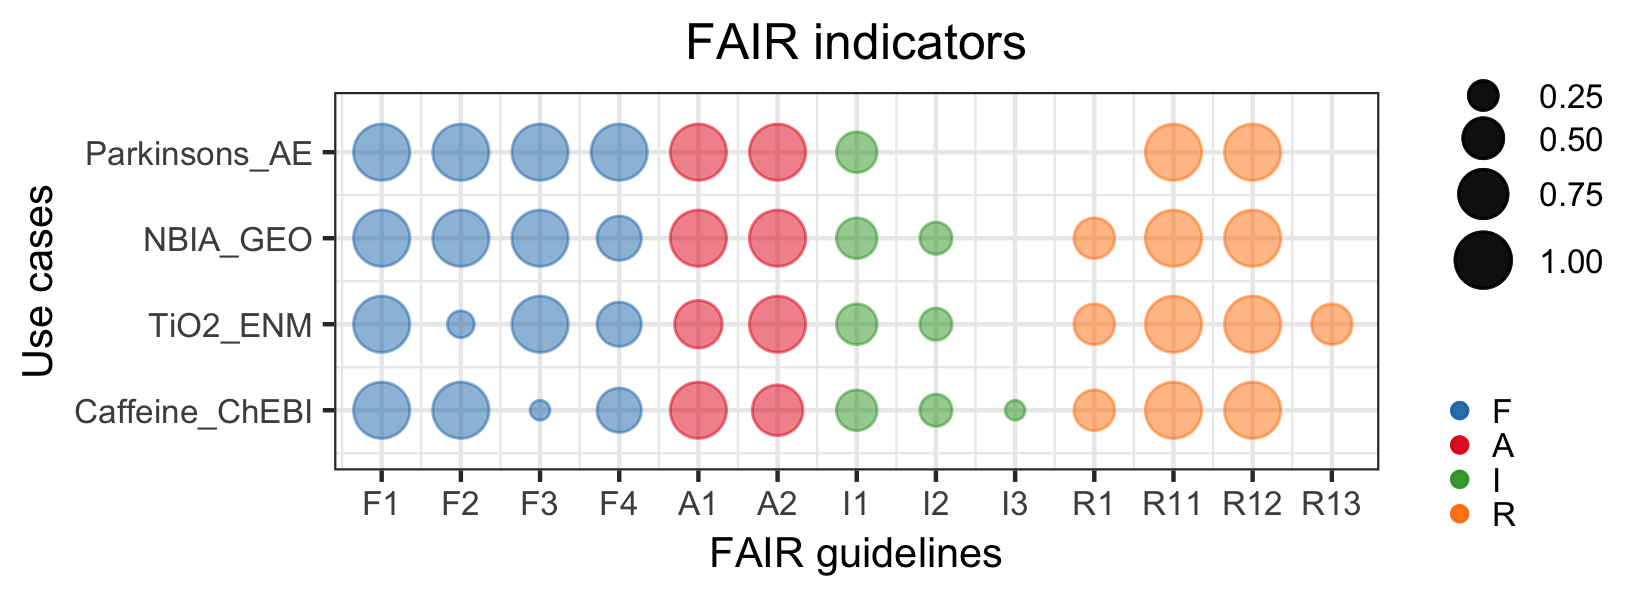

In [6]:
%%R -i df -w 5.5 -h 2 --units in -r 300 #-i df 

library(ggplot2)

title_text_size <- 12
axis_text_size  <- 10
tick_text_size  <- 8

# variables
metric_names  <- c("F1", "F2", "F3", "F4", "A1", "A2", "I1", "I2", "I3", "R1", "R11", "R12", "R13" )
x_values1     <- rep(1, length(metric_names))
x_values2     <- rep(2, length(metric_names))
x_values3     <- rep(3, length(metric_names))
x_values4     <- rep(4, length(metric_names))

y_values     <- seq(1, length(metric_names))
y_values     <- sort(y_values, decreasing = TRUE)
point_color  <- c("F",  "F",  "F",  "F",  "A",  "A",  "I",  "I",  "I",  "R",  "R",   "R",   "R"  )

pl <- ggplot (     data=df, aes(x=x_values1, y=y_values, color=point_color, size=Parkinsons_AE))+
        # points (all cases case)
        geom_point(alpha=0.5) +
        geom_point(data=df, aes(x=x_values2, y=y_values, color=point_color, size=NBIA_GEO), alpha=0.5)+
        geom_point(data=df, aes(x=x_values3, y=y_values, color=point_color, size=TiO2_ENM), alpha=0.5)+
        geom_point(data=df, aes(x=x_values4, y=y_values, color=point_color, size=Caffeine_ChEBI), alpha=0.5)+
        scale_size_area() + 
        # background
        theme_bw() +  
        # flip x and y
        coord_flip()  +
        # axis ticks
        scale_x_reverse(limits=c(4.5,0.5), breaks=seq(4,1,-1),  labels=rev(colnames(df))) + 
        scale_y_reverse(limits=c(13, 1),   breaks=seq(13,1,-1), labels=metric_names) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) +
        # axis text
        xlab ("Use cases") +
        ylab ("FAIR guidelines") +
        theme(text = element_text( size = axis_text_size )) + 
        # change colors
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00") ,
                         labels = c("F", "A", "I", "R"),
                         breaks = c("F", "A", "I", "R")
                         ) +  
        # title
        ggtitle("FAIR indicators") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5))  +
        # legend - colors
        theme(legend.text = element_text(size=tick_text_size),
              legend.key.size = unit(0.2, "cm")) + 
        labs(color="") +  # no legend title   
        labs(size="")  +   # no legend title 
        theme (legend.spacing.y = unit(0.05, "cm")) # reduce vertical space between legends
       

# display
pl

In [67]:
%%R 
ggsave("outcome_comparison.pdf", plot = last_plot(), width=5.5, height=2, dpi=300) # comment if used in mybinder, uncomment if used locally 

In [16]:
%%R
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.13.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggplot2_3.1.0

loaded via a namespace (and not attached):
 [1] colorspace_1.3-2 scales_1.0.0     plyr_1.8.4       lazyeval_0.2.1  
 [5] withr_2.1.2      pillar_1.4.0     gtable_0.2.0     tibble_2.1.1    
 [9] crayon_1.3.4     Rcpp_1.0.0       grid_3.3.3       pkgconfig_2.0.2 
[13] rlang_0.3.4      munsell_0.5.0   


In [8]:
%%R
sessionInfo()

R version 3.3.3 (2017-03-06)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.13.6

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     


Find kind of API from re3data.org

In [1]:
import requests
import xml.etree.ElementTree as ET

In [2]:
# print metadata as a more readable version from xml file
def print_metadata (root, schema):
    
    for i in range (0, len(root[0])):

        # tag
        tag  = root[0][i].tag
        tag  = tag.replace(schema, "") # to improve redeability
        print (str(i) + '.' + str(tag))

        # text
        if len(root[0][i]) == 0:
            text = root[0][i].text
            print ("   " + str(text))
        else:
            for a in range (0, len(root[0][i])):
                tag  = root[0][i][a].tag
                tag  = tag.replace(schema, "") # to improve redeability
                print ("      " + str(tag))
                text = root[0][i][a].text
                print ("        " + str(text))
    print (" ")

In [3]:
def look_for_tag_text (root, schema, characteristic):
    
    # look for content
    text = []

    for i in range (0, len(root[0])):

        # tag
        tag  = root[0][i].tag
        tag  = tag.replace(schema, "")

        if tag == characteristic:            
            if len(root[0][i]) == 0:
                text.append(root[0][i].text)
            else:
                for a in range (0, len(root[0][i])):
                    tag  = root[0][i][a].tag
                    tag  = tag.replace(schema, "") # to improve redeability
                    text.append(root[0][i][a].text)

    return text

In [4]:
repository_names = ['Gene Expression Omnibus', 'ArrayExpress', 'ChEBI']
registry_api_url = 'https://www.re3data.org/api/v1/repositories'

base_api_url         = 'https://www.re3data.org/api/v1/'
repositories_api_url = base_api_url + 'repositories'
repository_api_url   = base_api_url + 'repository'
schema               = '{http://www.re3data.org/schema/2-2}' # in the metadata xml

attribute_string = []

In [5]:
# contact the registry
r_registry = requests.get(registry_api_url)
# put output string in a structured xml tree
root = ET.fromstring(r_registry.text)

In [6]:
for a in range(0, len(repository_names)):
    
    # look for the wanted repository
    for i in range (0, len(root)):
        if root[i][1].text == repository_names[a]: # first index is a <repository> group, 
                                               # second index is for the tags inside (<id>, <name>, <link>)
 
            print ("Repository: " + str(repository_names[a]))
            print ("  Index in list: " + str(i))
            print ("  Tag          : " + str(root[i][1].tag))
            print ("  Text         : " + str(root[i][1].text))
            print ("  Tag          : " + str(root[i][2].tag))
            print ("  Attribute    : " + str(root[i][2].attrib)) # attributes do not have a closing tag
            print (" ")

            attribute_string.append(str(root[i][2].attrib["href"]))
        

Repository: Gene Expression Omnibus
  Index in list: 249
  Tag          : name
  Text         : Gene Expression Omnibus
  Tag          : link
  Attribute    : {'href': '/api/v1/repository/r3d100010283', 'rel': 'self'}
 
Repository: ArrayExpress
  Index in list: 195
  Tag          : name
  Text         : ArrayExpress
  Tag          : link
  Attribute    : {'href': '/api/v1/repository/r3d100010222', 'rel': 'self'}
 
Repository: ChEBI
  Index in list: 2076
  Tag          : name
  Text         : ChEBI
  Tag          : link
  Attribute    : {'href': '/api/v1/repository/r3d100012626', 'rel': 'self'}
 


In [9]:
for a in range(0, len(attribute_string)):
    
    print ("--> Repository: " + str(repository_names[a]))
    
    metadata_str = attribute_string[a]
    
    # extract repository number 
    repository_number = metadata_str[metadata_str.rfind('/') : len(metadata_str)]
    # metadata_url
    metadata_url      = repository_api_url + repository_number
    print ("  " + str(metadata_url))
    
    # access the repository metadata 
    r_repo = requests.get(metadata_url)
    
    # put the r_repo string in a structured xml tree
    root_repo = ET.fromstring(r_repo.text)
    
    # print the output 
    #print (r_repo.text) # in original xml
    #print_metadata (root_repo, schema) # only tags and texts
    
    output = look_for_tag_text (root_repo, schema, 'api')

#     if len(output) > 0:
#         R11 = 1
#     else:
#         R11 = 0
#     print ("R11: " + str(R11) )
    print (output)



    

--> Repository: Gene Expression Omnibus
  https://www.re3data.org/api/v1/repository/r3d100010283
['ftp://ftp.ncbi.nlm.nih.gov/geo/']
--> Repository: ArrayExpress
  https://www.re3data.org/api/v1/repository/r3d100010222
['ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/', 'https://www.ebi.ac.uk/arrayexpress/help/programmatic_access.html']
--> Repository: ChEBI
  https://www.re3data.org/api/v1/repository/r3d100012626
['https://www.ebi.ac.uk/chebi/webServices.do', 'ftp://ftp.ebi.ac.uk/pub/databases/chebi/']


In [13]:
# all licenses 
for a in range(0, len(attribute_string)):
    
    print ("Repository: " + str(repository_names[a]))
    
    metadata_str = attribute_string[a]
    
    # extract repository number 
    repository_number = metadata_str[metadata_str.rfind('/') : len(metadata_str)]
    # metadata_url
    metadata_url      = repository_api_url + repository_number
    
    # access the repository metadata 
    r_repo = requests.get(metadata_url)
    
    # put the r_repo string in a structured xml tree
    root_repo = ET.fromstring(r_repo.text)
    
    # licenses
    output = look_for_tag_text (root_repo, schema, "dataLicense")
    print ("  dataLicense      : " + str(output))
    output = look_for_tag_text (root_repo, schema, "dataUploadLicense")
    print ("  dataUploadLicense: " + str(output))
    output = look_for_tag_text (root_repo, schema, "databaseLicense")
    print ("  databaseLicense  : " + str(output))    
    output = look_for_tag_text (root_repo, schema, "databaseLicense")
    print ("  databaseLicense  : " + str(output)) 
    # repositoryIdentifier
    output = look_for_tag_text (root_repo, schema, "repositoryIdentifier")
    print ("  repositoryIdentifier : " + str(output)) 
    # API
    output = look_for_tag_text (root_repo, schema, "api")
    print ("  api : " + str(output)) 
    # metadata standard
    output = look_for_tag_text (root_repo, schema, "metadataStandard")
    print ("  metadataStandard : " + str(output)) 
    
    
    print (" ")

Repository: Gene Expression Omnibus
  dataLicense      : ['Copyrights', 'http://www.ncbi.nlm.nih.gov/geo/info/disclaimer.html']
  dataUploadLicense: ['Submitting data', 'https://www.ncbi.nlm.nih.gov/geo/info/submission.html']
  databaseLicense  : []
  databaseLicense  : []
  repositoryIdentifier : ['RRID:nif-0000-00142', 'RRID:SCR_007303', 'RRID:OMICS_01030']
  api : ['ftp://ftp.ncbi.nlm.nih.gov/geo/']
  metadataStandard : []
 
Repository: ArrayExpress
  dataLicense      : ['other', 'https://www.ebi.ac.uk/arrayexpress/help/data_availability.html']
  dataUploadLicense: ['Submission overview guidelines', 'https://www.ebi.ac.uk/arrayexpress/help/submissions_overview.html']
  databaseLicense  : []
  databaseLicense  : []
  repositoryIdentifier : ['RRID:nif-0000-30123', 'RRID:SCR_002964', 'FAIRsharing_doi:10.25504/FAIRsharing.6k0kwd', 'OMICS_01023']
  api : ['ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/', 'https://www.ebi.ac.uk/arrayexpress/help/programmatic_access.html']
  metadata

In [17]:
for a in range(0, len(attribute_string)):
    
    print ("--> Repository: " + str(repository_names[a]))
    
    metadata_str = attribute_string[a]
    
    # extract repository number 
    repository_number = metadata_str[metadata_str.rfind('/') : len(metadata_str)]
    # metadata_url
    metadata_url      = repository_api_url + repository_number
    print ("  " + str(metadata_url))
    
    # access the repository metadata 
    r_repo = requests.get(metadata_url)
    
    # put the r_repo string in a structured xml tree
    root_repo = ET.fromstring(r_repo.text)
    
    # print the output 
    #print (r_repo.text) # in original xml
    print_metadata (root_repo, schema) # only tags and texts


--> Repository: Gene Expression Omnibus
  https://www.re3data.org/api/v1/repository/r3d100010283
0.re3data.orgIdentifier
   r3d100010283
1.repositoryName
   Gene Expression Omnibus
2.additionalName
   GEO
3.repositoryURL
   http://www.ncbi.nlm.nih.gov/geo/
4.repositoryIdentifier
   RRID:nif-0000-00142
5.repositoryIdentifier
   RRID:SCR_007303
6.repositoryIdentifier
   RRID:OMICS_01030
7.description
   Gene Expression Omnibus: a public functional genomics data repository supporting MIAME-compliant data submissions. Array- and sequence-based data are accepted. Tools are provided to help users query and download experiments and curated gene expression profiles.
8.repositoryContact
   geo@ncbi.nlm.nih.gov
9.type
   disciplinary
10.size
   Platforms 17.251 ; Samples 2.072.423 ; Series 84.386; DataSets 4.348
11.startDate
   2002
12.endDate
   None
13.repositoryLanguage
   eng
14.subject
   20105 General Genetics
15.subject
   201 Basic Biological and Medical Research
16.subject
   21 Biology